## Consumer & Visitor Insights For Neighborhoods
### 针对Kaggle数据集Consumer & Visitor Insights For Neighborhoods进行数据分析及预处理

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=Warning)
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [36]:
# 加载数据
cbg = pd.read_csv("./visit-patterns-by-census-block-group/cbg_patterns.csv", index_col = 0)
cbg.head()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
census_block_group,,,,,,,,,,,,
1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


## 1.数据可视化和摘要

### 1.1数据摘要

In [22]:
#数据摘要
cbg.describe(include=['object'])

,visitor_home_cbgs,visitor_work_cbgs,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
count,220735,220735,220735,220735,220735,220735,220735
unique,191832,166013,73198,185558,98086,220630,220630
top,{},{},[],[],[],[],{}
freq,28412,51152,35542,2983,74540,106,106


7个标称属性的信息如上表所示

In [23]:
# 每列的聚类及其个数
for i in cbg.columns:
    print(i)
    print(cbg[i].value_counts())
    

date_range_start
1538352000    220735
Name: date_range_start, dtype: int64
date_range_end
1541030400    220735
Name: date_range_end, dtype: int64
raw_visit_count
24531.0     15
12455.0     14
10888.0     14
21721.0     14
17801.0     13
16773.0     13
8524.0      13
15073.0     13
15161.0     13
11894.0     13
12980.0     13
17421.0     13
14482.0     13
12961.0     13
25796.0     13
16747.0     13
17567.0     13
15378.0     13
27618.0     13
21836.0     13
19911.0     13
15338.0     12
17419.0     12
11389.0     12
20390.0     12
12812.0     12
18861.0     12
25127.0     12
16338.0     12
14154.0     12
            ..
60669.0      1
108235.0     1
60670.0      1
94432.0      1
91460.0      1
81846.0      1
88565.0      1
153513.0     1
85144.0      1
471996.0     1
143524.0     1
153526.0     1
59418.0      1
67664.0      1
350032.0     1
80070.0      1
88559.0      1
58315.0      1
123050.0     1
78798.0      1
177120.0     1
935.0        1
76759.0      1
124678.0     1
3878.0       

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

[]                                                                                                                                                                                           2983
["SmartStyle Family Hair Salons"]                                                                                                                                                             335
["Department of Veterans Affairs"]                                                                                                                                                            156
["H&R Block"]                                                                                                                                                                                 134
["Sprint"]                                                                                                                                                                                    112
["MasterCuts"]                

[]                                                                                                                                                   106
[2775,2718,2724,2713,2730,2827,3274,4672,3577,3456,3796,3778,3935,4010,3984,5073,4603,4625,4047,3733,3603,3191,3008,2888]                              1
[1518,1539,1473,1501,1457,1566,1760,2429,2105,1998,2039,2188,2246,2224,2344,2800,2653,2707,2443,2240,2169,1969,1721,1753]                              1
[643,599,578,571,574,551,628,1306,807,585,444,470,435,490,668,981,759,857,930,836,759,758,692,650]                                                     1
[1573,1490,1501,1512,1590,1899,2566,4538,3387,3511,3670,4702,4289,4213,4174,5407,5300,5494,5070,3760,3072,2668,2015,1758]                              1
[1996,1942,1860,1849,1892,1979,2936,9119,8142,7499,7037,7237,7059,6908,7650,7630,4620,4417,4559,3728,3618,3042,2434,2101]                              1
[2029,1841,1687,1652,1767,2204,2563,3035,2993,2790,3140,3521,3896,3957,4116,4725,4

{}                                                                                                                    106
{"Monday":7071,"Tuesday":7497,"Wednesday":6954,"Thursday":5873,"Friday":6597,"Saturday":6181,"Sunday":5759}             1
{"Monday":3727,"Tuesday":3870,"Wednesday":3805,"Thursday":2823,"Friday":3016,"Saturday":2863,"Sunday":3037}             1
{"Monday":13042,"Tuesday":13297,"Wednesday":12871,"Thursday":10852,"Friday":11737,"Saturday":11476,"Sunday":10092}      1
{"Monday":6386,"Tuesday":6833,"Wednesday":6545,"Thursday":5841,"Friday":6583,"Saturday":5564,"Sunday":5880}             1
{"Monday":6706,"Tuesday":6584,"Wednesday":6585,"Thursday":5712,"Friday":6319,"Saturday":6013,"Sunday":5466}             1
{"Monday":6768,"Tuesday":6972,"Wednesday":6880,"Thursday":5646,"Friday":5713,"Saturday":4651,"Sunday":3971}             1
{"Monday":1854,"Tuesday":1914,"Wednesday":1910,"Thursday":1571,"Friday":1635,"Saturday":1296,"Sunday":1261}             1
{"Monday":792,"Tuesday":

In [24]:
# 默认统计数值属性
cbg.describe()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
count,2.207350e+05,2.207350e+05,2.206290e+05,2.206290e+05,2.205180e+05
mean,1.538352e+09,1.541030e+09,4.793066e+04,1.182032e+04,3.511280e+04
std,0.000000e+00,0.000000e+00,6.252655e+04,3.045832e+04,9.973193e+04
min,1.538352e+09,1.541030e+09,6.000000e+01,5.000000e+01,7.060000e+02
25%,1.538352e+09,1.541030e+09,1.704200e+04,3.430000e+03,8.584000e+03
50%,1.538352e+09,1.541030e+09,3.064000e+04,6.541000e+03,1.461400e+04
75%,1.538352e+09,1.541030e+09,5.667800e+04,1.309900e+04,3.139775e+04
max,1.538352e+09,1.541030e+09,7.179900e+06,6.113949e+06,6.297845e+06


5种数值属性的五数概括如上:最小值；第一四分位数；第二四分位数（中位数）；第三四分位数；最大值

In [25]:
# 数值属性缺失值的个数及缺失率
for i in cbg.columns:
    num_null=sum(pd.isnull(cbg[i]))
    rate=num_null/len(cbg[i])
    print(i)
    print("num_null= %d, rate=%.3f" %(num_null,rate))

date_range_start
num_null= 0, rate=0.000
date_range_end
num_null= 0, rate=0.000
raw_visit_count
num_null= 106, rate=0.000
raw_visitor_count
num_null= 106, rate=0.000
visitor_home_cbgs
num_null= 0, rate=0.000
visitor_work_cbgs
num_null= 0, rate=0.000
distance_from_home
num_null= 217, rate=0.001
related_same_day_brand
num_null= 0, rate=0.000
related_same_month_brand
num_null= 0, rate=0.000
top_brands
num_null= 0, rate=0.000
popularity_by_hour
num_null= 0, rate=0.000
popularity_by_day
num_null= 0, rate=0.000


raw_visit_count,raw_visitor_count,raw_visitor_count这三个属性有缺失值，缺失值个数分别为106，106，217

### 1.2 数据可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC01F36B70>,
      dtype=object)

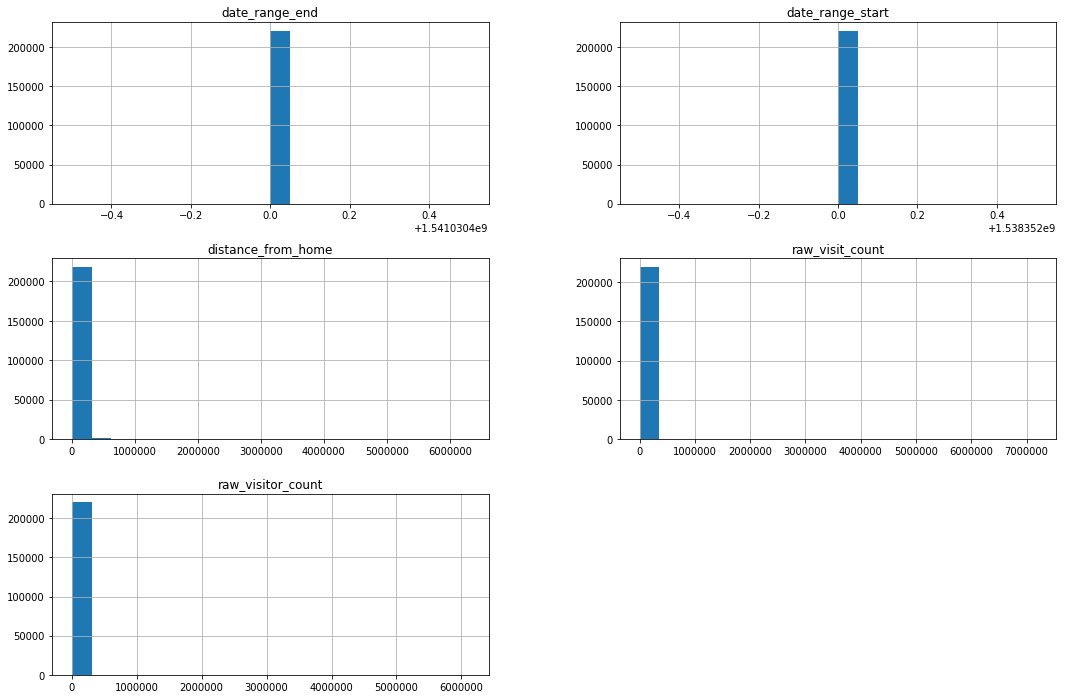

In [26]:
cbg.hist(layout=(3,2),bins=20,figsize=(18,12))

date_range_start


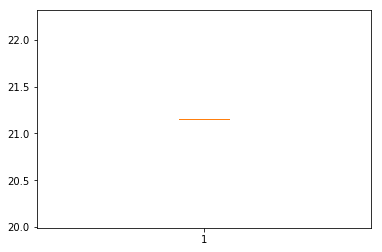

date_range_start 无离群点
date_range_end


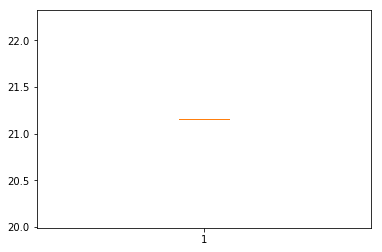

date_range_end 无离群点
raw_visit_count


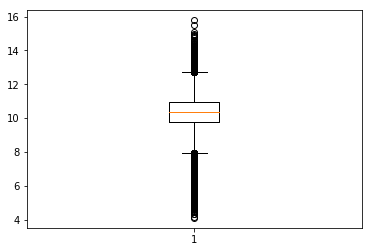

raw_visit_count 的离群点: [ 4.09434456  4.15888308  4.30406509 ... 15.08571089 15.50283334
 15.78679601]
raw_visitor_count


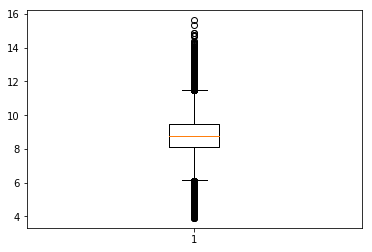

raw_visitor_count 的离群点: [ 3.91202301  3.91202301  3.93182563 ... 14.8830638  15.34721825
 15.62608344]
distance_from_home


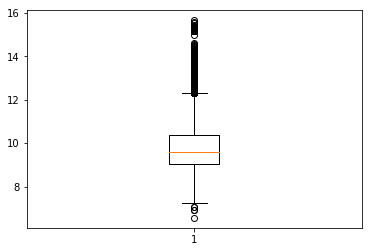

distance_from_home 的离群点: [ 6.55961524  6.90173721  6.91869522 ... 15.52489697 15.58459846
 15.65571807]


In [27]:
# 盒图 由于图过于扁平 因此做取对数处理
# 删除缺失值部分
for i in cbg.columns:
    if cbg[i].dtype==object:
        continue
    tmp=cbg[i].copy(deep=False)
    tmp=np.log(tmp)
    # 删除缺失值部分
    if any(tmp.isnull()):
        tmp.dropna(inplace=True)
    p=plt.boxplot(x=tmp)
    print(i)
    plt.show()
    y=p['fliers'][0].get_ydata()
    if y.any():
        y.sort()
        print(i,"的离群点:",y)
    else:
        print(i,"无离群点")

## 2.数据缺失值的处理

In [28]:
for i in cbg.columns:
    print(i,"is null:")
    print(cbg[cbg[i].isnull().values==True][i])


date_range_start is null:
Series([], Name: date_range_start, dtype: int64)
date_range_end is null:
Series([], Name: date_range_end, dtype: int64)
raw_visit_count is null:
census_block_group
 2.605399e+11   NaN
 6.912099e+11   NaN
 7.205799e+11   NaN
 2.060000e+10   NaN
 3.600394e+11   NaN
 6.601095e+11   NaN
 7.210999e+11   NaN
 4.508997e+11   NaN
 6.002095e+11   NaN
 3.504394e+11   NaN
 6.601095e+11   NaN
 2.606199e+11   NaN
 4.807199e+11   NaN
 4.101999e+11   NaN
 7.212399e+11   NaN
 3.600505e+11   NaN
 2.601399e+11   NaN
 5.306199e+11   NaN
 5.119593e+11   NaN
 3.010198e+11   NaN
 7.211999e+11   NaN
 7.205599e+11   NaN
 7.206599e+11   NaN
 1.500704e+11   NaN
 6.601095e+11   NaN
 1.319198e+11   NaN
 3.704193e+11   NaN
 3.606394e+11   NaN
 7.211599e+11   NaN
 3.601910e+11   NaN
                 ..
 1.500199e+11   NaN
 1.500199e+11   NaN
 1.206599e+11   NaN
 6.908595e+11   NaN
 2.401785e+11   NaN
 5.505199e+11   NaN
 3.251099e+11   NaN
 7.201599e+11   NaN
 1.500199e+11   NaN
 7.201199e

可以发现，raw_visit_count(106),raw_visitor_count(106)缺失，推测由于统计信息时没有统计到该时间段内到cbg游玩的总次数及人数，distance_from_home有217项没有统计成功，缺少部分到家的距离信息

### 2.1将缺失部分剔除

对 raw_visit_count 处理前的分布：


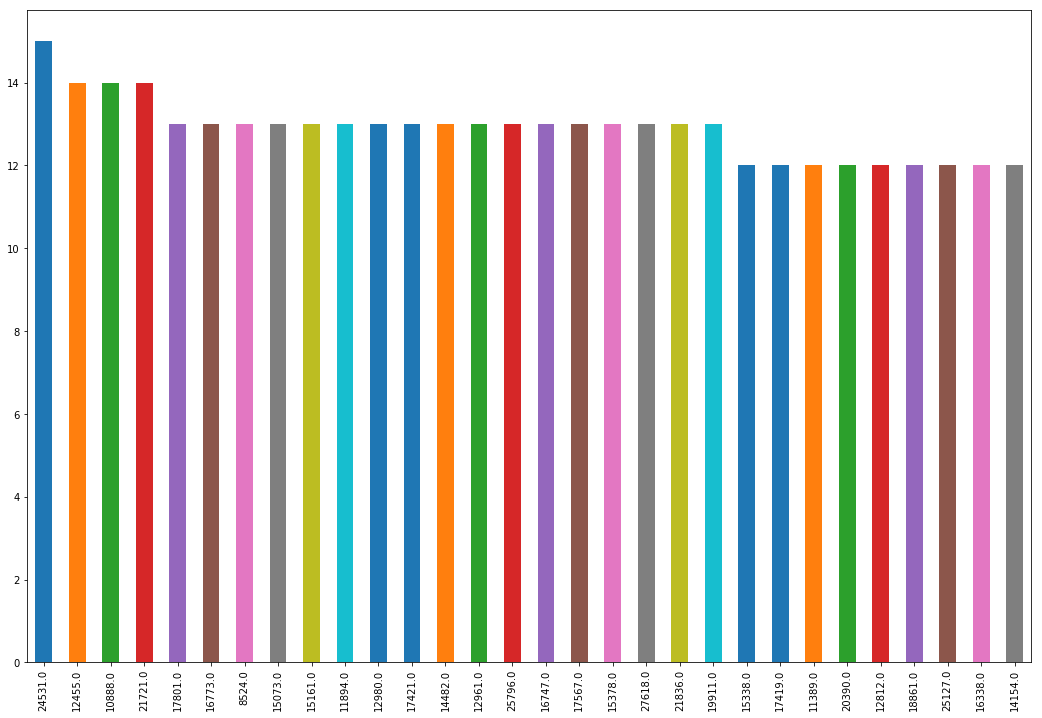

对 raw_visit_count 处理后的分布：


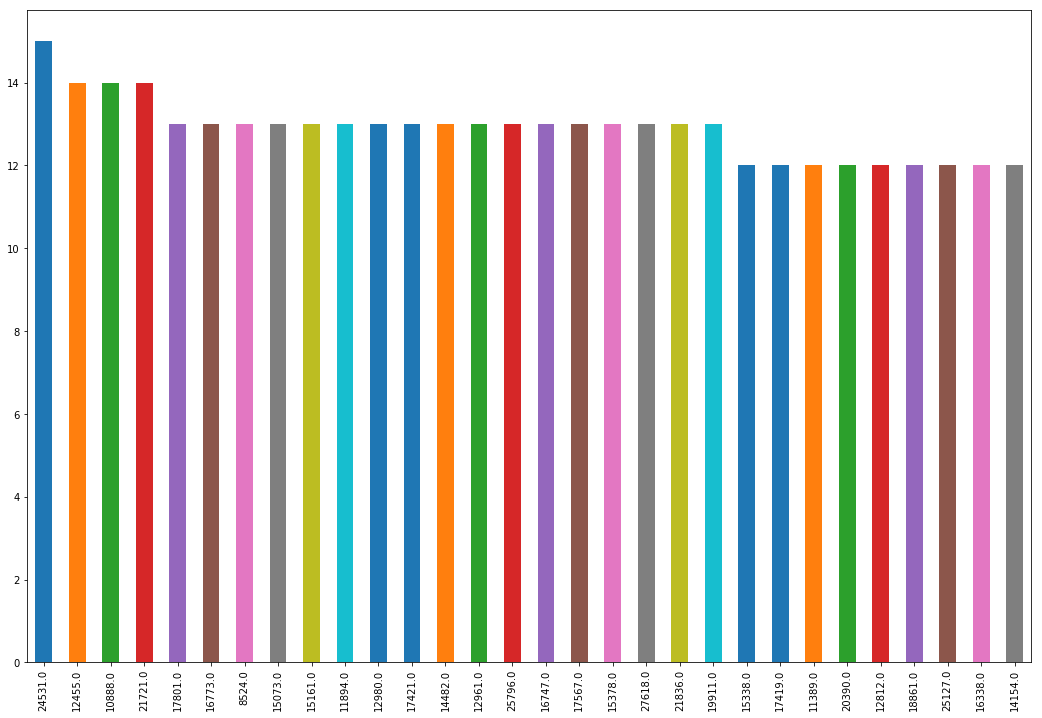

对 raw_visitor_count 处理前的分布：


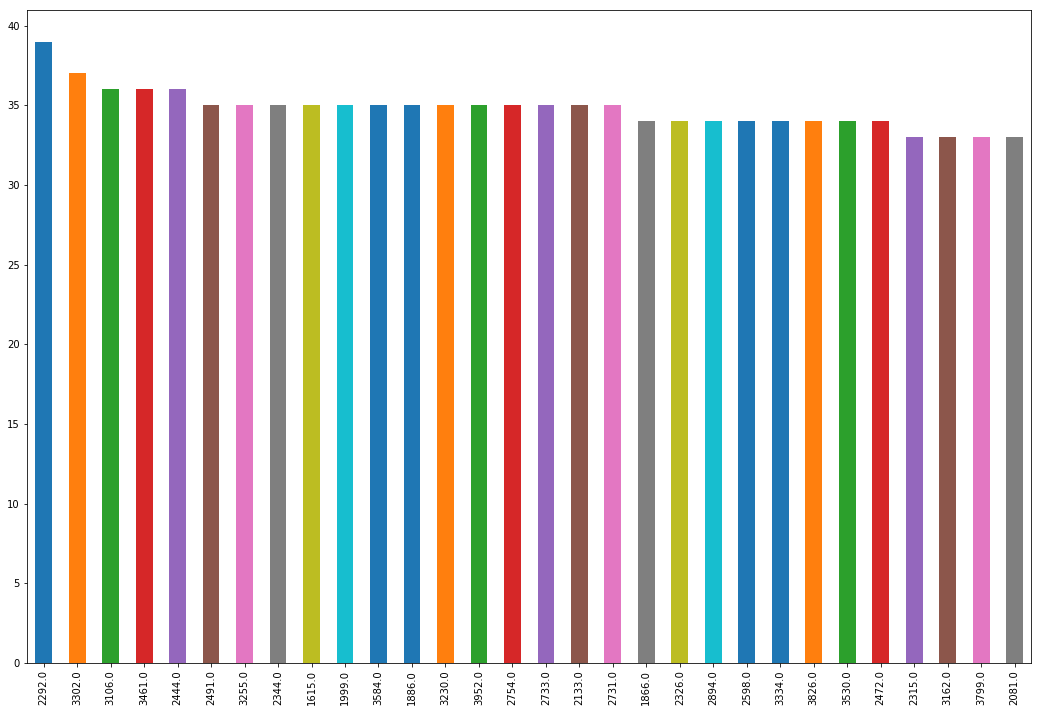

对 raw_visitor_count 处理后的分布：


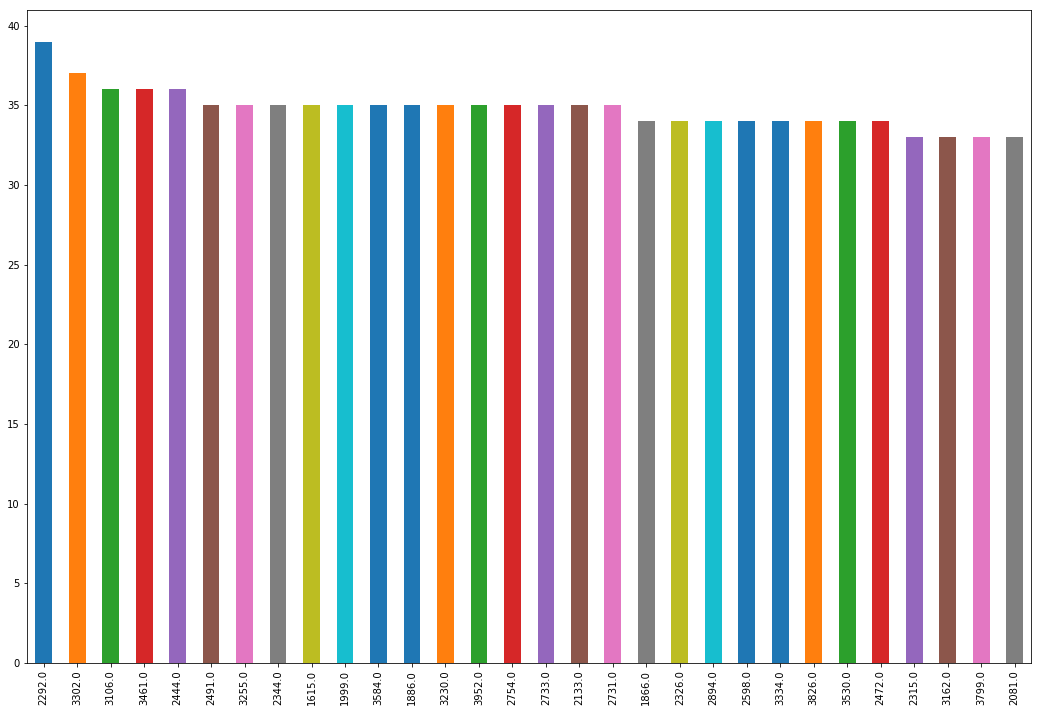

对 distance_from_home 处理前的分布：


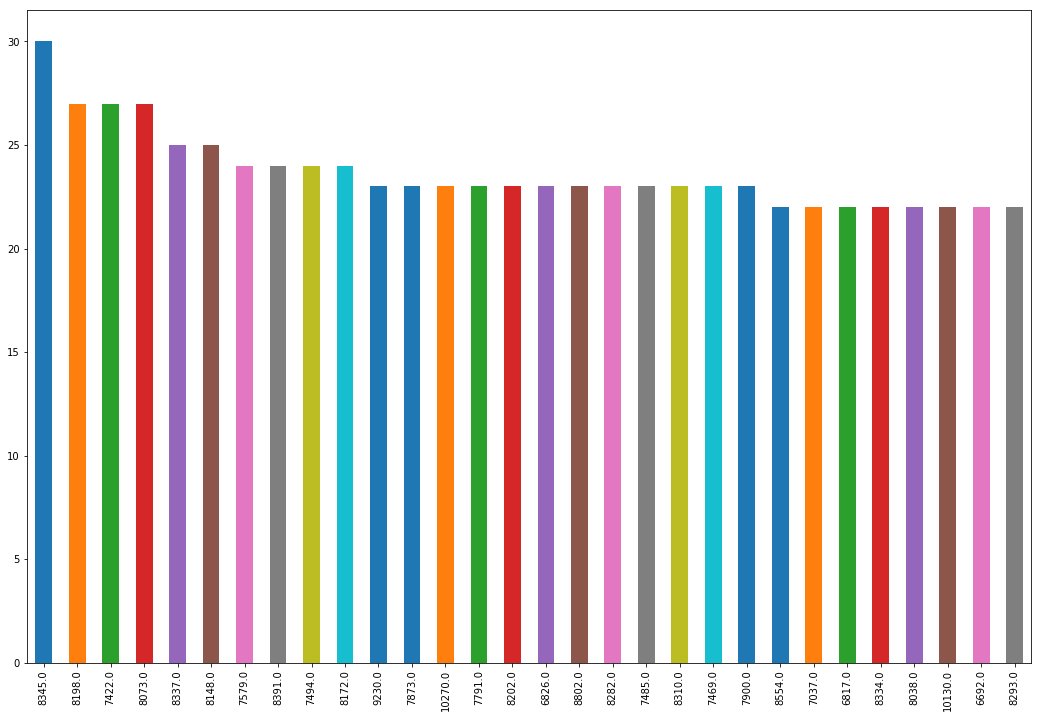

对 distance_from_home 处理后的分布：


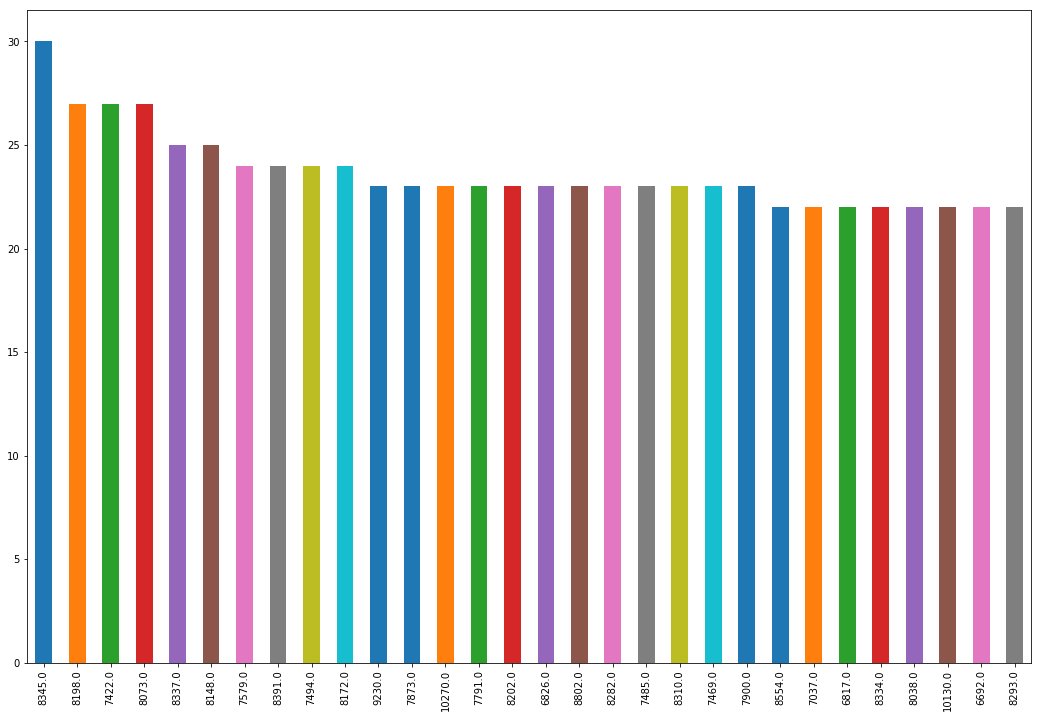

In [85]:
# 将缺失部分直接剔除,以top30数据为例进行分析
# 直方图
df1=cbg.copy()
df2=cbg.copy()
n=["raw_visit_count","raw_visitor_count","distance_from_home"]
for i in n:
    print("对",i,"处理前的分布：")
    df2[i].value_counts().head(30).plot.bar(figsize=(18,12))
    plt.show()
    
    print("对",i,"处理后的分布：")
    df1[i].dropna(how='any').value_counts().head(30).plot.bar(figsize=(18,12))
    plt.show()
   

可以看到，剔除缺失值后的数据和剔除之前差距不大，比较合理

### 2.2 用最高频率值来填补缺失值

对 raw_visit_count 处理前的分布：


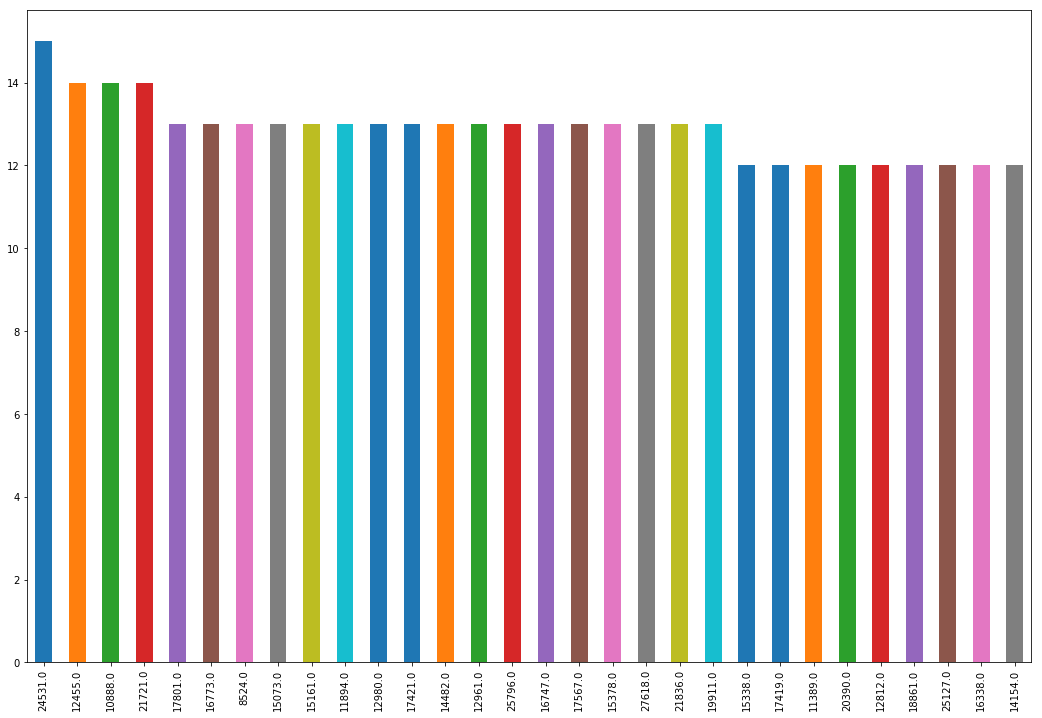

对 raw_visit_count 处理后的分布：


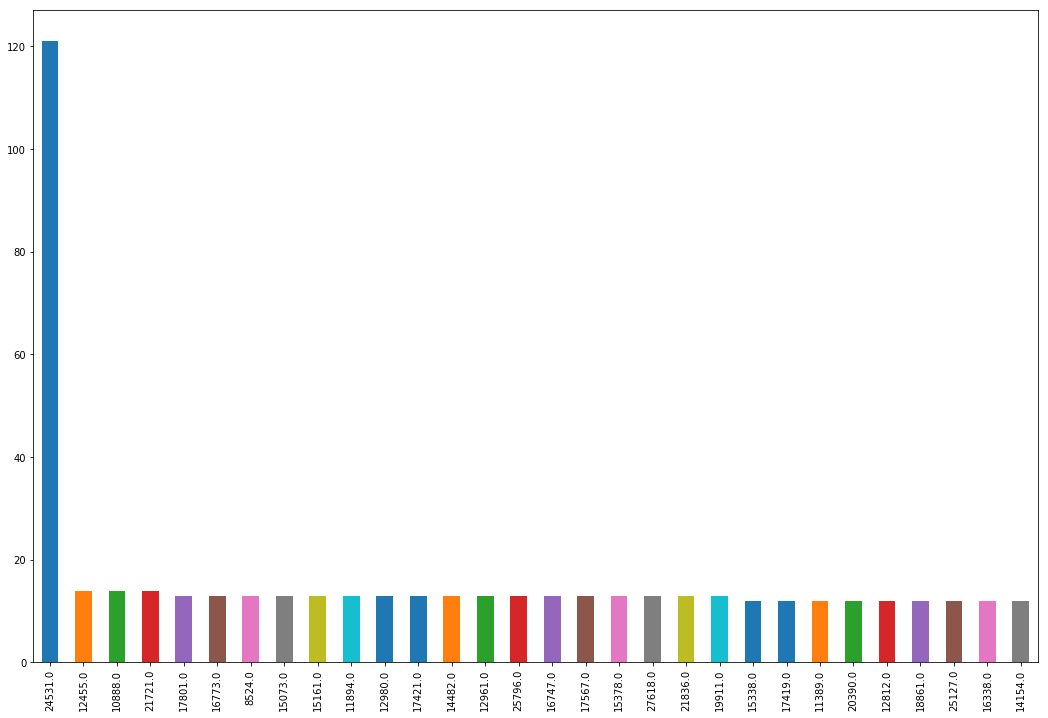

对 raw_visitor_count 处理前的分布：


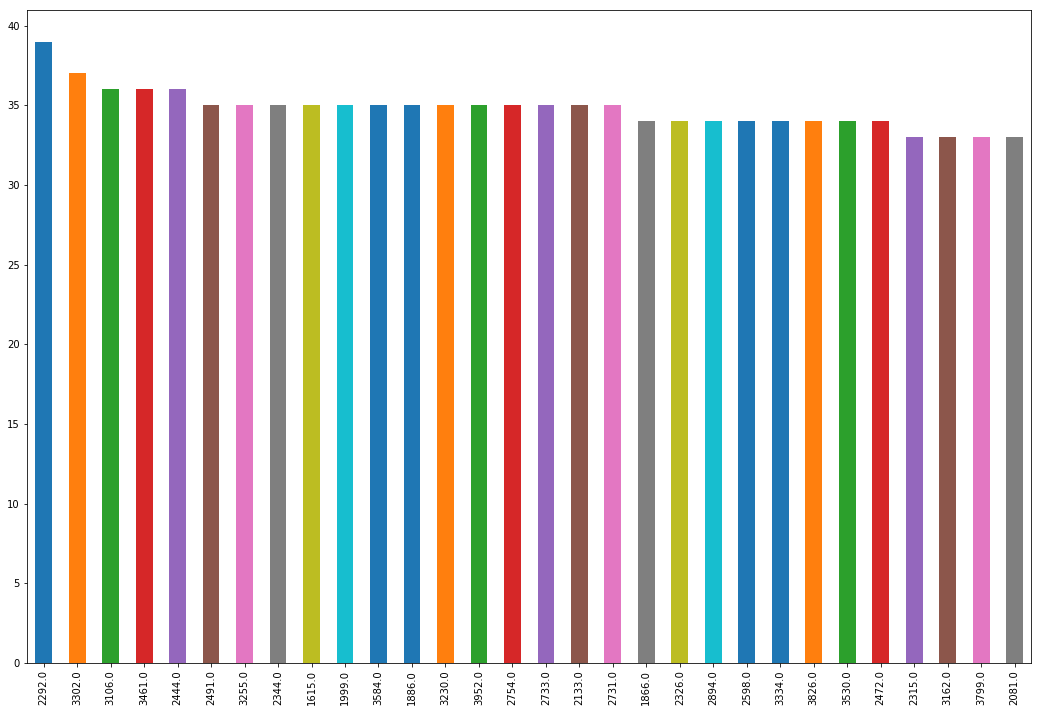

对 raw_visitor_count 处理后的分布：


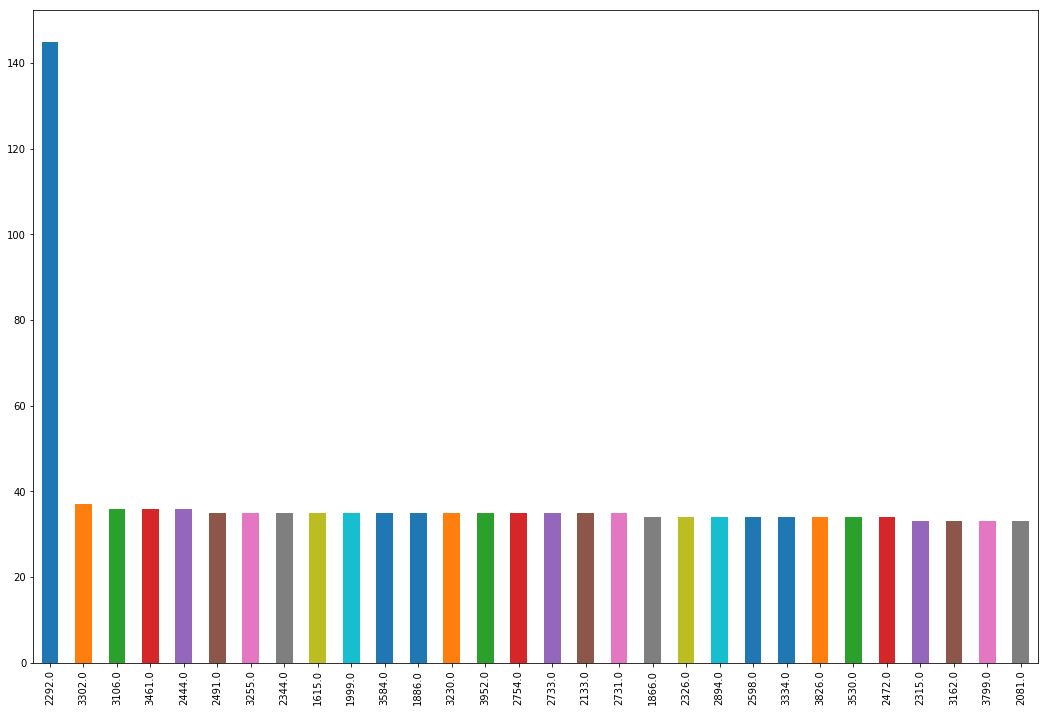

对 distance_from_home 处理前的分布：


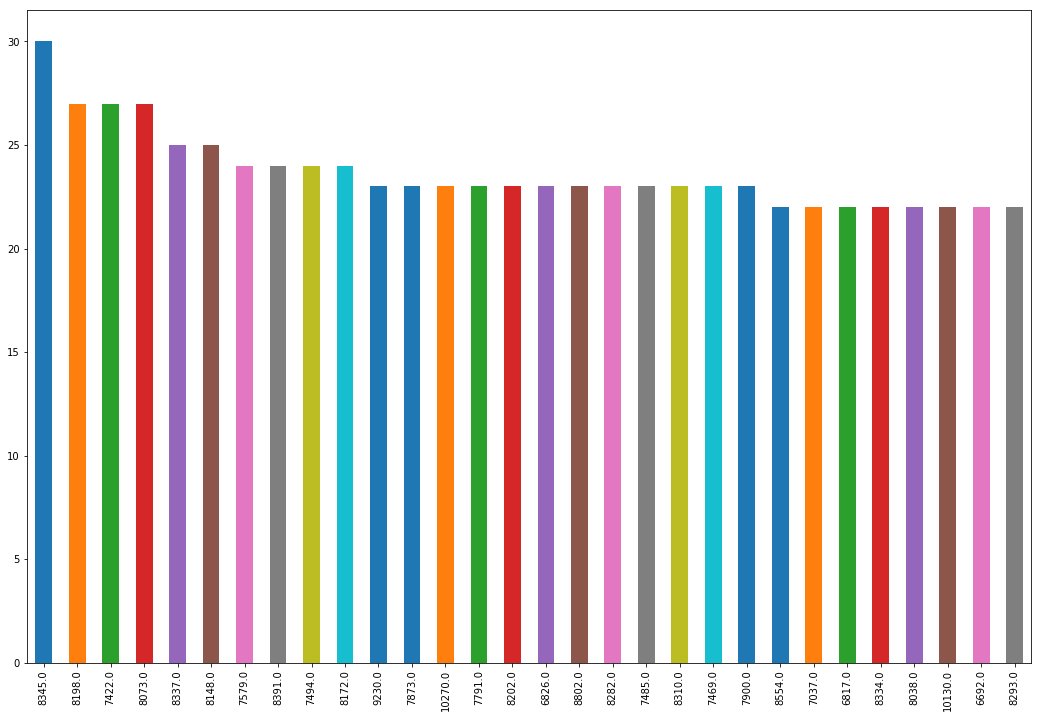

对 distance_from_home 处理后的分布：


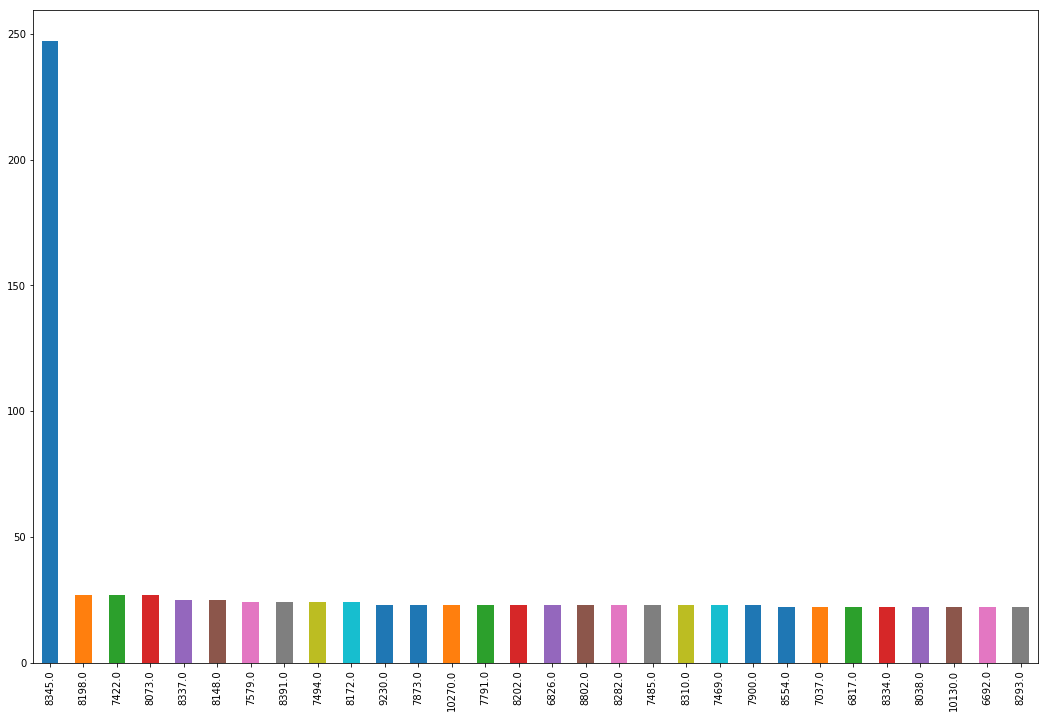

In [86]:
# 用最高频率值来填补缺失值
# 对前30的数据做可视化
for i in n:
    print("对",i,"处理前的分布：")
    df1[i].value_counts().head(30).plot.bar(figsize=(18,12))
    plt.show()
    
    print("对",i,"处理后的分布：")
    fill=df2[i].value_counts().argmax()
    s2=df2[i].fillna(fill).value_counts()
    s2.head(30).plot.bar(figsize=(18,12))
    plt.show()

由上图可知，填充频数最高的值（Reserve）以后，数据明显倾向于原本频数最高的数据，并且十分明显，该方法不是很合理。

### 2.3通过属性的相关关系来填补缺失值

In [87]:
orrdf = cbg.corr()
corrdf

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
date_range_start,NaN,NaN,NaN,NaN,NaN
date_range_end,NaN,NaN,NaN,NaN,NaN
raw_visit_count,NaN,NaN,1.000000,0.815850,0.021721
raw_visitor_count,NaN,NaN,0.815850,1.000000,0.032879
distance_from_home,NaN,NaN,0.021721,0.032879,1.000000


通过计算相关系数发现raw_visitor_count	和raw_visit_count存在较强的相关性，因此通过raw_visitor_count来对raw_visit_count的缺失值进行填充。采用多变量插补的方式使用IterativeImputer类，它将每个缺失值的特征建模为其他特征的函数，并使用该估计值进行估算。以迭代循环方式执行：在每个步骤中，将raw_visit_count指定为输出y，将raw_visitor_count视为输入X。使用一个回归器来在已知y的样本上，对（Ｘ，ｙ）进行拟合。然后使用这个回归器来预测缺失的ｙ值。

对raw_visit_count处理前的分布：


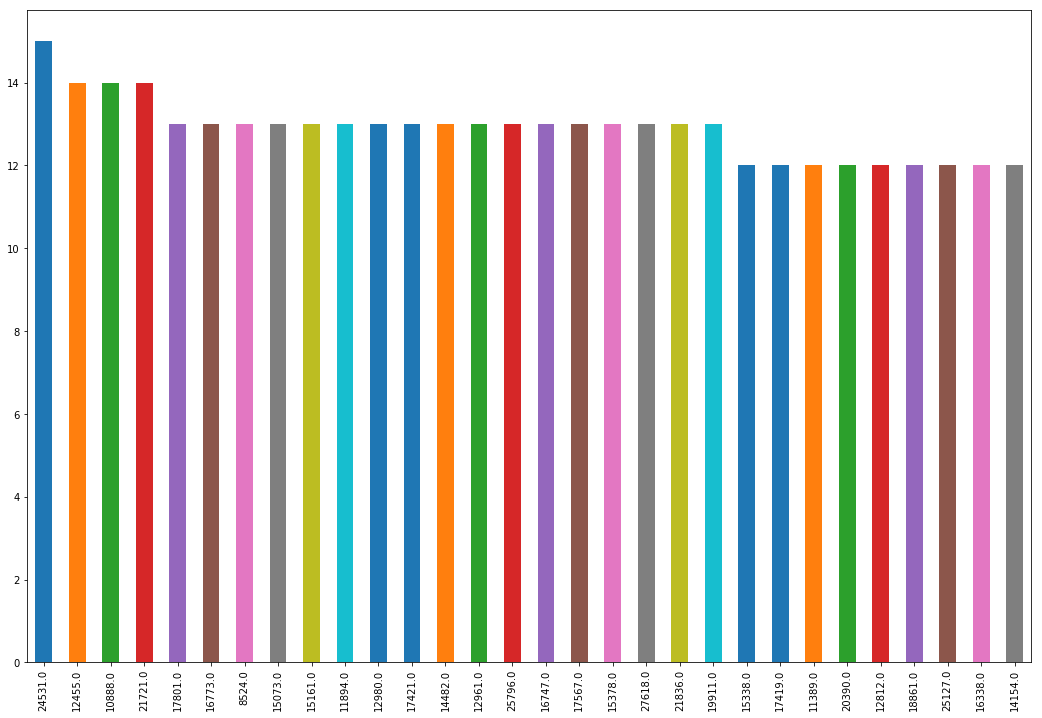

对raw_visit_count处理后的分布：


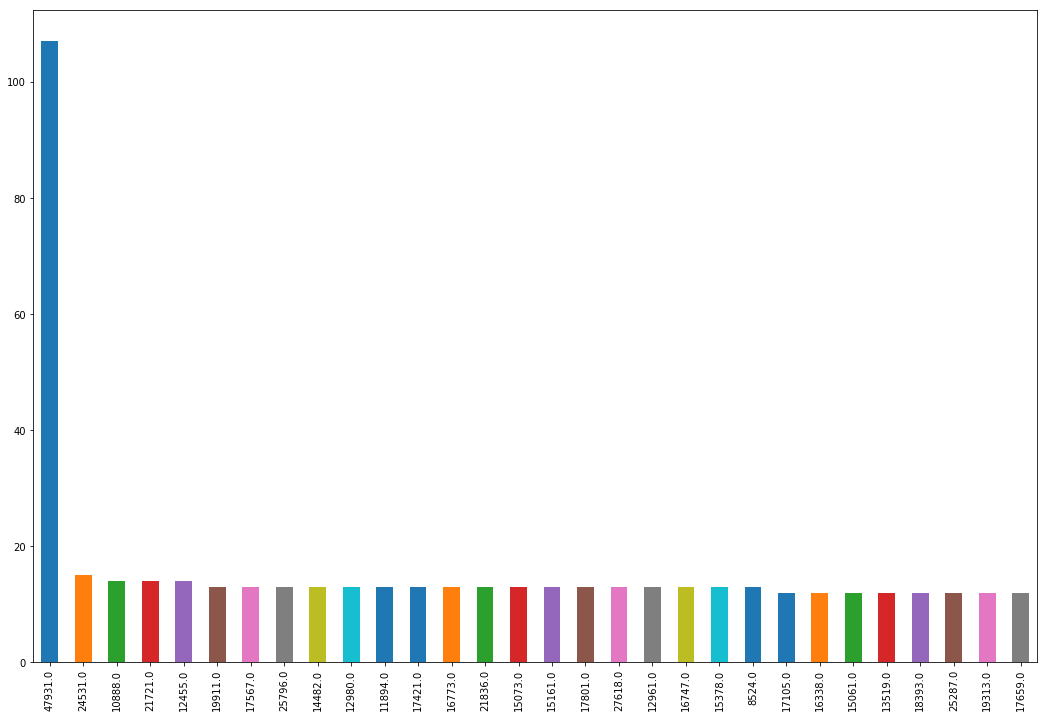

In [89]:
imp = IterativeImputer(max_iter=4)
s1=imp.fit_transform(cbg[['raw_visitor_count','raw_visit_count']])
s1=np.round(s1)
data_list = map(lambda x: x[0], s1[:,[1]])
s1=pd.Series(data_list).value_counts()
# 以raw_visit_count为例,对前30的做可视化
print("对raw_visit_count处理前的分布：")
s2=df2['raw_visit_count'].value_counts()
s2.head(30).plot.bar(figsize=(18,12))
plt.show()
print("对raw_visit_count处理后的分布：")
s1.head(30).plot.bar(figsize=(18,12))
plt.show()

通过直方图可以得知，通过相关性拟合，同样也出现了数据偏移，推测是由于这两个属性在一定程度上同时为缺失值，因此拟合效果并不好

### 2.4 通过数据对象之间的相似性来填补缺失值

#### 采用随机森林来对缺失值进行拟合。

In [90]:
from  sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
def set_missing(df,estimate_list,miss_col):
    """df要处理的数据帧，estimate_list用来估计缺失值的字段列表,miss_col缺失字段名称;会直接在原来的数据帧上修改"""
    col_list=estimate_list
    col_list.extend(miss_col)  
    process_df = df[col_list]

    class_le= LabelEncoder()
    for i in col_list[:-1]:
        process_df.loc[:,i]=class_le.fit_transform(process_df.loc[:,i].values)
    # 分成已知该特征和未知该特征两部分
    
    known=process_df[process_df[miss_col].isnull().values==False].values
#     print(process_df[miss_col].notnull())
    known[:, -1]=class_le.fit_transform(known[:, -1])
    unknown = process_df[process_df[miss_col].isnull().values==True].values
    # X为特征属性值
    X = known[:, :-1]

    # y为结果标签值
    y = known[:, -1]
    # fit到RandomForestRegressor之中
    rfr = ensemble.RandomForestRegressor(random_state=1, n_estimators=200,max_depth=4,n_jobs=-1)
    rfr.fit(X,y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, :-1]).round(0).astype(int)
    predicted=class_le.inverse_transform(predicted)
    # 用得到的预测结果填补原缺失数据
#     print( df[df[miss_col].isnull().values==True][miss_col])
#     print(len(predicted))
    df[df[miss_col].isnull().values==True][miss_col] = predicted
    return df
 
s1=set_missing(df=df1,estimate_list=['raw_visitor_count'],miss_col=['raw_visit_count'])['raw_visit_count']
s1=s1.value_counts()
print(s1[:100])

24531.0     15
12455.0     14
10888.0     14
21721.0     14
17801.0     13
16773.0     13
8524.0      13
15073.0     13
15161.0     13
11894.0     13
12980.0     13
17421.0     13
14482.0     13
12961.0     13
25796.0     13
16747.0     13
17567.0     13
15378.0     13
27618.0     13
21836.0     13
19911.0     13
15338.0     12
17419.0     12
11389.0     12
20390.0     12
12812.0     12
18861.0     12
25127.0     12
16338.0     12
14154.0     12
            ..
63040.0      1
179645.0     1
89823.0      1
81664.0      1
75278.0      1
101672.0     1
108045.0     1
179650.0     1
37794.0      1
150553.0     1
14937.0      1
89826.0      1
45896.0      1
106122.0     1
150550.0     1
108033.0     1
432130.0     1
150490.0     1
110977.0     1
179686.0     1
150506.0     1
4906.0       1
38750.0      1
76350.0      1
43400.0      1
4771.0       1
45199.0      1
216035.0     1
37796.0      1
100.0        1
Name: raw_visit_count, Length: 82248, dtype: int64


对raw_visit_count处理前的分布：


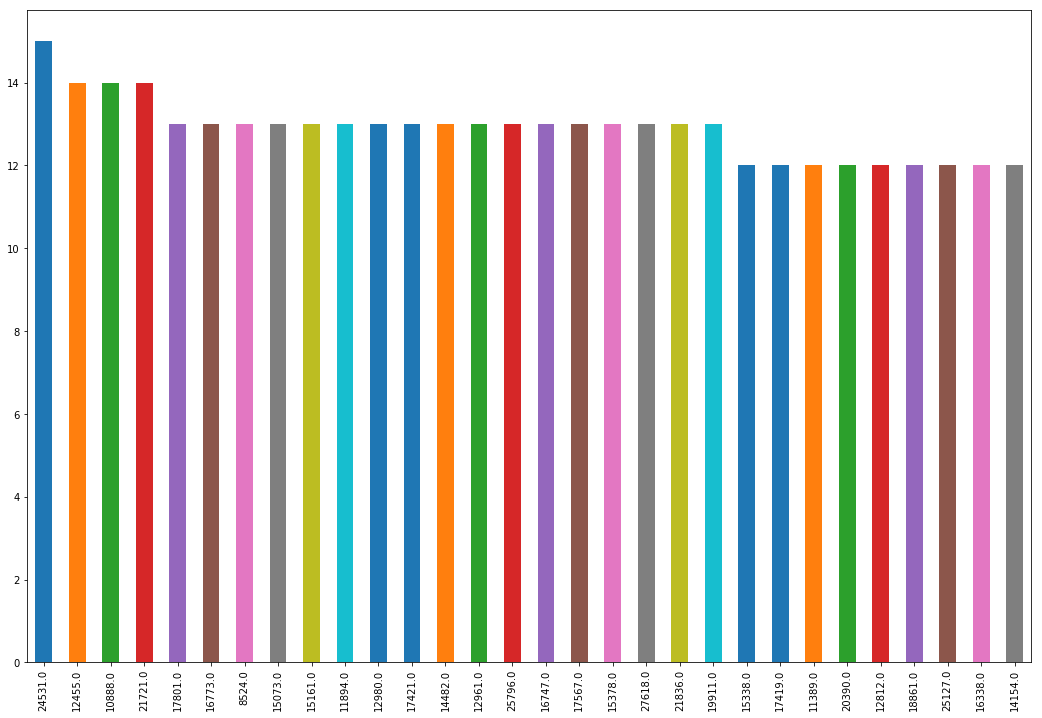

对raw_visit_count处理后的分布：


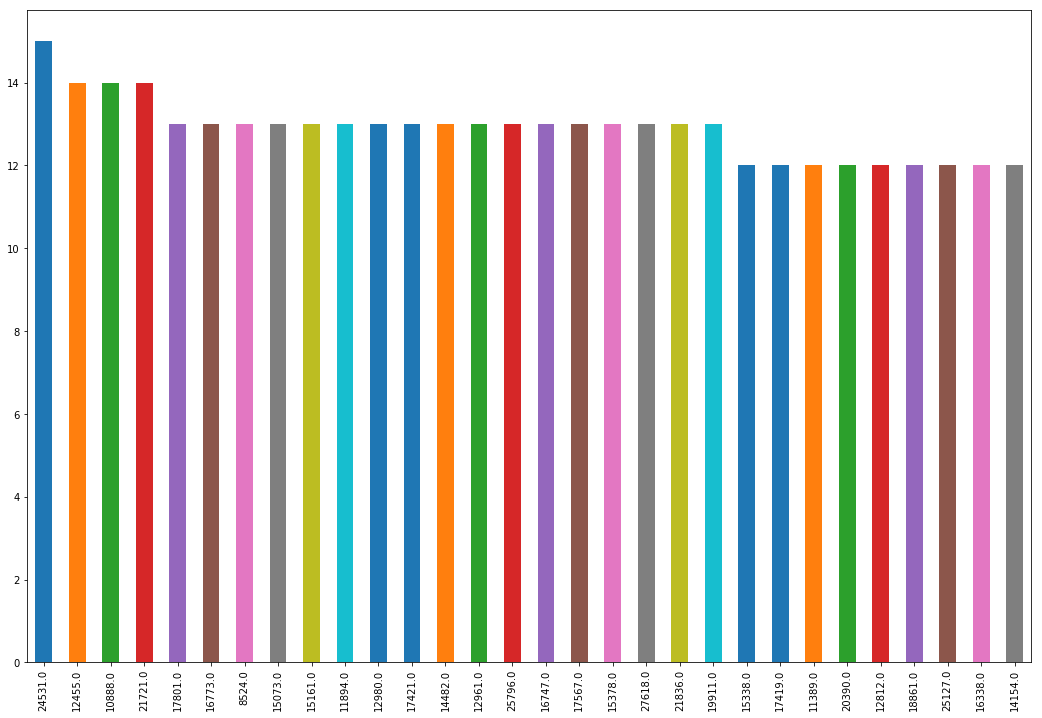

In [91]:
print("对raw_visit_count处理前的分布：")
s2=df2['raw_visit_count'].value_counts()
s2.head(30).plot.bar(figsize=(18,12))
plt.show()
print("对raw_visit_count处理后的分布：")
s1.head(30).plot.bar(figsize=(18,12))
plt.show()

观察直方图，发现通过随机森林对数据进行相似性的拟合来填充缺失值后，数据的分布基本和之前一致，这说明该方法对本数据集有效